### 로지스틱 회귀(Logistic Regression) - 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- sigmoid 함수

In [2]:
def sigmoid(x,a=1,b=0):
    return (1. / (1 + np.exp(-a * (x-b))))

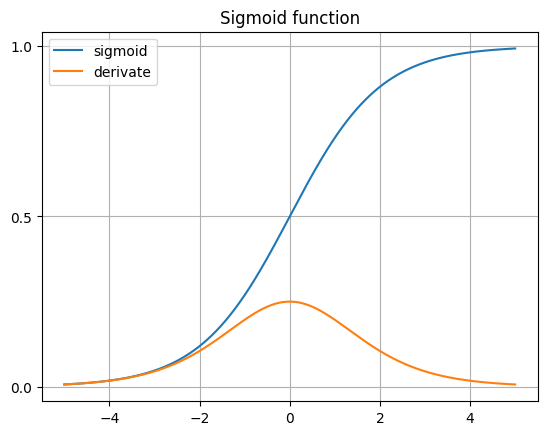

In [4]:
xs = np.linspace(-5,5,1000)
ys = sigmoid(xs)


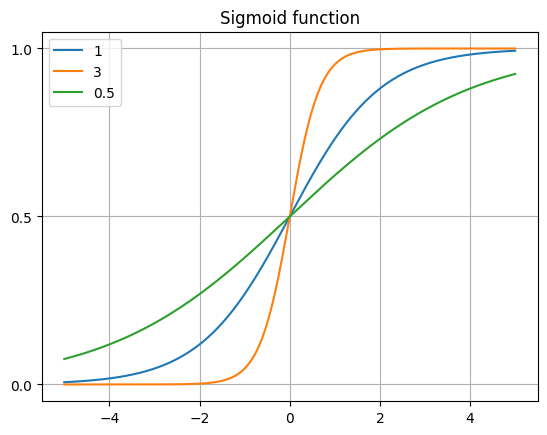

In [5]:
# a 값에 따른 변화
y3 = sigmoid(xs,a=3)
y_half = sigmoid(xs, a=0.5)

plt.plot(xs,ys,label='1')
plt.plot(xs,y3,label='3')
plt.plot(xs,y_half,label='0.5')
plt.title('Sigmoid function')
plt.yticks([0,0.5,1])
plt.grid(),plt.legend();

In [ ]:
# b 값에 따른 변화
y_plus2 = sigmoid(xs,b=2)
y_minus2 = sigmoid(xs,)
y3 = sigmoid(xs,a=3)
y_half = sigmoid(xs, a=0.5)

plt.plot(xs,ys,label='1')
plt.plot(xs,y3,label='3')
plt.plot(xs,y_half,label='0.5')
plt.title('Sigmoid function')
plt.yticks([0,0.5,1])
plt.grid(),plt.legend();

In [6]:
pima = pd.read_csv('data/pima-indians-diabetes.csv',skiprows=9,header=None)
pima.columns = ['P','G','BP','S','I','BMI','D','Age','Target']
pima.head()

,P,G,BP,S,I,BMI,D,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
y = pima.Target.values
X = pima.iloc[:,:-1].values

In [8]:
# 로지스틱 회귀를 사용하려면 데이터를 표준화/정규화해야 함
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, stratify=y,test_size=0.2,random_state=2023
)

In [10]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2023)
lrc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2023,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
lrc.fit(X_train,y_train)
lrc.score(X_test,y_test)

0.7987012987012987

In [12]:
# 선형회귀의 가중치(계수)
lrc.coef_

array([[ 0.43899154,  1.10852013, -0.21920447,  0.0610045 , -0.21882506,
         0.67110797,  0.21628174,  0.13662499]])

In [13]:
# 선형회귀의 바이어스(절편)
lrc.intercept_

array([-0.83697953])

In [14]:
X_test[0], y_test[0]

(array([-8.44885053e-01, -3.78365371e+00, -5.71502470e-02,  9.07269925e-01,
        -6.92890572e-01,  9.41978774e-04, -2.50296268e-01, -9.56461683e-01]),
 0)

In [16]:
# X_test[0]가 1이 될 확률, sigmoid 함수 적용전 값
val = np.dot(lrc.coef_,X_test[0]) + lrc.intercept_
val[0]

-5.366815192951741

In [17]:
sigmoid(val)[0]

0.004647279406231874

In [18]:
lrc.predict_proba(X_test[:1])

array([[0.99535272, 0.00464728]])

In [21]:
from sklearn.datasets import load_iris
iris =load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_std, iris.target, stratify=iris.target,test_size=0.2,random_state=2023
)

In [23]:
lrc = LogisticRegression(random_state=2023)
lrc.fit(X_train,y_train)
lrc.score(X_test,y_test)

0.9666666666666667

In [24]:
lrc.predict_proba(X_test[:1])

array([[3.30286696e-05, 7.71018326e-03, 9.92256788e-01]])

In [25]:
lrc.coef_, lrc.intercept_

(array([[-1.04982073,  1.07867605, -1.77729719, -1.6588771 ],
        [ 0.58058167, -0.40675824, -0.39205087, -0.72718   ],
        [ 0.46923906, -0.67191782,  2.16934806,  2.38605711]]),
 array([-0.17112899,  1.8490486 , -1.67791961]))

In [27]:
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_
val

array([-5.25442751,  0.19849377,  5.05593374])

In [28]:
sigmoid(val)

array([0.00519718, 0.54946115, 0.99366892])

In [29]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [30]:
softmax(np.array([0.1,1,2]))

array([0.09856589, 0.24243297, 0.65900114])

In [32]:
# 다중 분류에서 predict_proba() 값은 softmax() 적용 값
softmax(val)

array([3.30286696e-05, 7.71018326e-03, 9.92256788e-01])

In [34]:
lrc.predict_proba(X_test[:1])

array([[3.30286696e-05, 7.71018326e-03, 9.92256788e-01]])